<a href="https://colab.research.google.com/github/pkmariya/Statistics/blob/main/Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Statistics
## Measures of Central Tendency
  * Mean
  * Median
  * Mode

## Measures of Spread/Dispersion
  * Standard Deviation
  * Variance
  * Range
  * Inter Quartile Range (IQR)

## Association between variables
#### Association b/w two numerical variables
  * Pearson Correlation
  * Spearman Correlation
  * Kendall Correlation

#### Association b/w two categorical variables
  * Contigency table (pd.crosstab)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Measures of Central Tendency

In [3]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


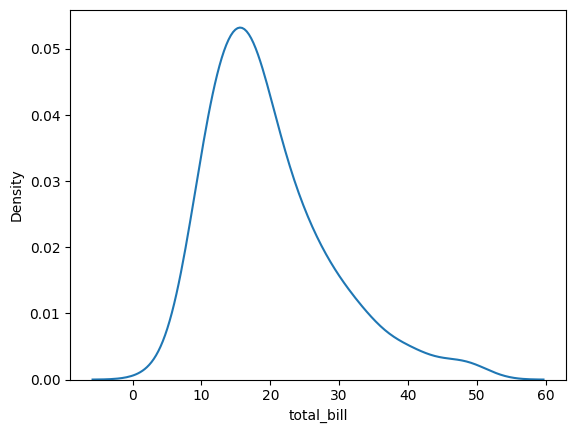

In [7]:
sns.kdeplot(tips['total_bill'])
plt.show()

##### Skewness in the graph indicates presence of outliers in the data

In [17]:
# Average bill of the customers
round(tips['total_bill'].mean(),2)

19.79

In [18]:
# Median bill of the customers
round(tips['total_bill'].median(),2)

17.8

##### The difference between mean and median shows that there are few outliers in the total_bill and we should trust median over mean in this case since mean is affected by the presence of outliers and hence they are not reliable measure of central tendency in the case of outliers present in the data

In [19]:
stats.mode(tips['total_bill'])

ModeResult(mode=13.42, count=3)

In [ ]:
stats.mode(tips.sex)

##### this indicates more Male customers to the restaurent

In [40]:
# Gender of max total bill along with the bill value
tips[tips['total_bill'] == tips['total_bill'].max()][['sex', 'total_bill']]

,sex,total_bill
170,Male,50.81


In [38]:
# Gender of the min total_bill along with the bill value
tips[tips['total_bill'] == tips['total_bill'].min()][['sex','total_bill']]

,sex,total_bill
67,Female,3.07


In [41]:
# The gender which gave max tips
tips[tips['tip'] == tips['tip'].max()][['sex','tip']]

,sex,tip
170,Male,10.0


In [46]:
# the gender who gave less tip
tips[tips.tip == tips.tip.min()][['sex', 'tip']]

,sex,tip
67,Female,1.0
92,Female,1.0
111,Female,1.0
236,Male,1.0


In [44]:
# Give me one record of the gender who gave min tip
tips[tips.tip == tips.tip.min()].iloc[0]

,67
total_bill,3.07
tip,1.0
sex,Female
smoker,Yes
day,Sat
time,Dinner
size,1


### Measures of Spread/Dispersion
* Variance
* Range
* Standard Deviation
* Interquartile Range

In [48]:
# Total variance in the total bill data
round(np.var(tips['total_bill']),2)

78.93

In [50]:
# Standard deviation of the total bill
round(np.std(tips['total_bill']),2)

8.88

##### Standard Deviation of 8.9 means that a customer pays 8.9 dollars more or less than the average bill. But since our data has few outliers, so we will use IQR(Inter-Quartile Range) over Standard Deviation.

In [51]:
q1 = np.percentile(tips['total_bill'], 25)
q3 = np.percentile(tips['total_bill'], 75)

In [54]:
iqr = q3 - q1
round(iqr, 2)

10.78

### Outlier removal using IQR

In [55]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [56]:
tips_copy = tips.copy()

In [59]:
# Keep only the values which are greater than lower fence and less than upper fence and drop the values outside this range which are basically the outliers
tips_copy = tips_copy[(tips_copy['total_bill'] >= lower_bound) & (tips_copy['total_bill'] <= upper_bound)]

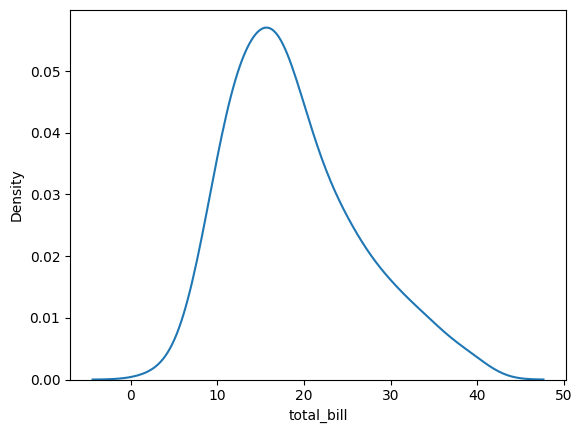

In [60]:
sns.kdeplot(tips_copy['total_bill'])
plt.show()

##### data now looks more balanced/normal after outlier removal as compared to data with outliers

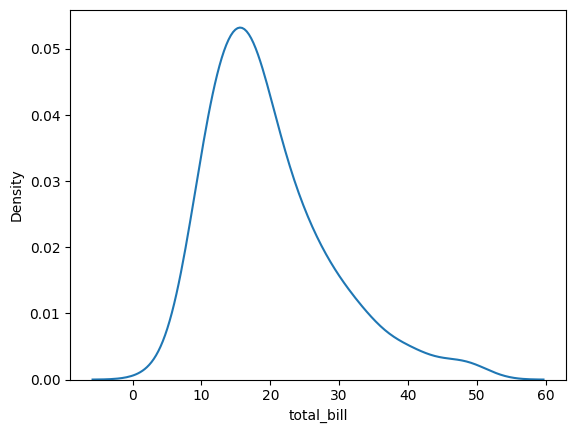

In [61]:
# plot of skewed data to compare with the above plot
sns.kdeplot(tips['total_bill'])
plt.show()

### Association between variables (columns)

Pearson correlation measures the linear relationship between two continuous variables. It assumes that the relationship between the variables is linear and that the data follow a normal distribution.

Pearson correlation coefficient (ρ) ranges from -1 to 1, where:

ρ=1 indicates a perfect positive linear relationship.
ρ=−1 indicates a perfect negative linear relationship.
ρ=0 indicates no linear relationship.
It's sensitive to outliers and can be affected by non-linear relationships.

2. Spearman Rank Correlation:

Spearman’s rank correlation measures the strength and direction of association between two ranked variables. It basically gives the measure of monotonicity of the relation between two variables i.e. how well the relationship between two variables could be represented using a monotonic function.

Monotonically Increasing: As the variable X increases, the variable Y never decreases.
Monotonically Decreasing: As the variable X increases, the variable Y never increases.
Not Monotonic: As the X variable increases, the Y variable sometimes decreases and sometimes increases.
It's based on the ranks of the data rather than the actual values. Spearman correlation coefficient (ρs) ranges from -1 to 1, where:

ρs = 1 indicates a perfect monotonic positive relationship.
ρs = −1 indicates a perfect monotonic negative relationship.
ρs = 0 indicates no monotonic relationship.
It's less sensitive to outliers and non-linear relationships compared to Pearson correlation. It's suitable for ordinal or skewed data.

3. Kendall Rank Correlation:

Kendall correlation also measures the strength of the monotonic relationship between two variables. Like Spearman correlation, it's based on the ranks of the data.

Kendall correlation coefficient (τ) ranges from -1 to 1, where:

τ=1 indicates a perfect monotonic positive relationship.
τ=−1 indicates a perfect monotonic negative relationship.
τ=0 indicates no monotonic relationship.
It's less affected by outliers and is robust to non-linear relationships. It's often used when dealing with small sample sizes or tied ranks.

** When to use which method**:

* **Pearson correlation**: Use when both variables are continuous and the relationship is assumed to be linear and follow a normal distribution.
* **Spearman rank correlation**: Use when the relationship is not necessarily linear, or when the data are ordinal or heavily skewed. It's more robust to outliers.
* **Kendall rank correlation**: Use when the relationship is not necessarily linear and when dealing with small sample sizes or tied ranks. It's also robust to outliers.

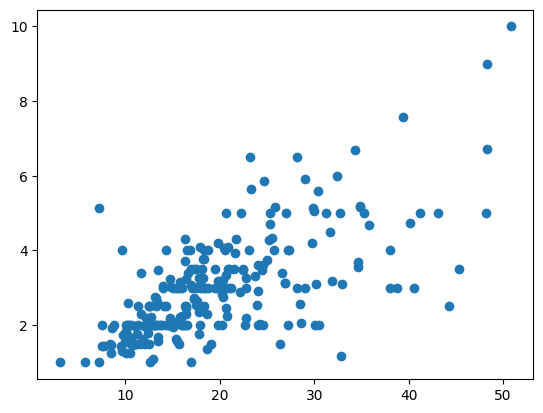

In [62]:
plt.scatter(tips.total_bill, tips.tip)

In [63]:
# Covariance amongst two columns
np.cov(tips.total_bill, tips.tip)

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

##### Note: Covariance between these 2 columns is 8.324

In [64]:
# Pearson correlation between two numerical columns
tips.total_bill.corr(tips.tip)

0.6757341092113641

##### So total bill and tip paid by the customer has moderate positive relation. In very simple terms it means that generally the customer with higher total bill tend to give more tip but this is not the case with all the customers.

In [65]:
from scipy.stats import pearsonr, spearmanr, kendalltau


In [68]:
# Pearson correlation
print(pearsonr(tips.total_bill, tips.tip)[0])

# Spearman correlation
print(spearmanr(tips.total_bill, tips.tip)[0])

# Kendall correlation
print(kendalltau(tips.total_bill, tips.tip)[0])

0.6757341092113647
0.6789681219001009
0.517180972142381


#### Association between two categorical columns
We use contingency table to represent the relation between 2 categorical columns. For this purpose we use pd.crosstab functions and we pass two categorical columns for that.

In [69]:
pd.crosstab(tips.sex, tips.smoker)

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


##### Above table indicates:

* There were 60 male customers who were smokers and 97 of them were non-smoker.
* There were 33 female customers who were smokers and 54 of them were non-smokers.